In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
X=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm'])

In [12]:
#dependent Feature

y = iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# APply Decision Tree C;assifier

from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [21]:
treeclassifier.fit(X_test,y_test)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.7\ngini = 0.664\nsamples = 30\nvalue = [10, 9, 11]'),
 Text(0.4, 0.5, 'x[3] <= 0.75\ngini = 0.499\nsamples = 19\nvalue = [10, 9, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.7, 0.6666666666666667, '  False')]

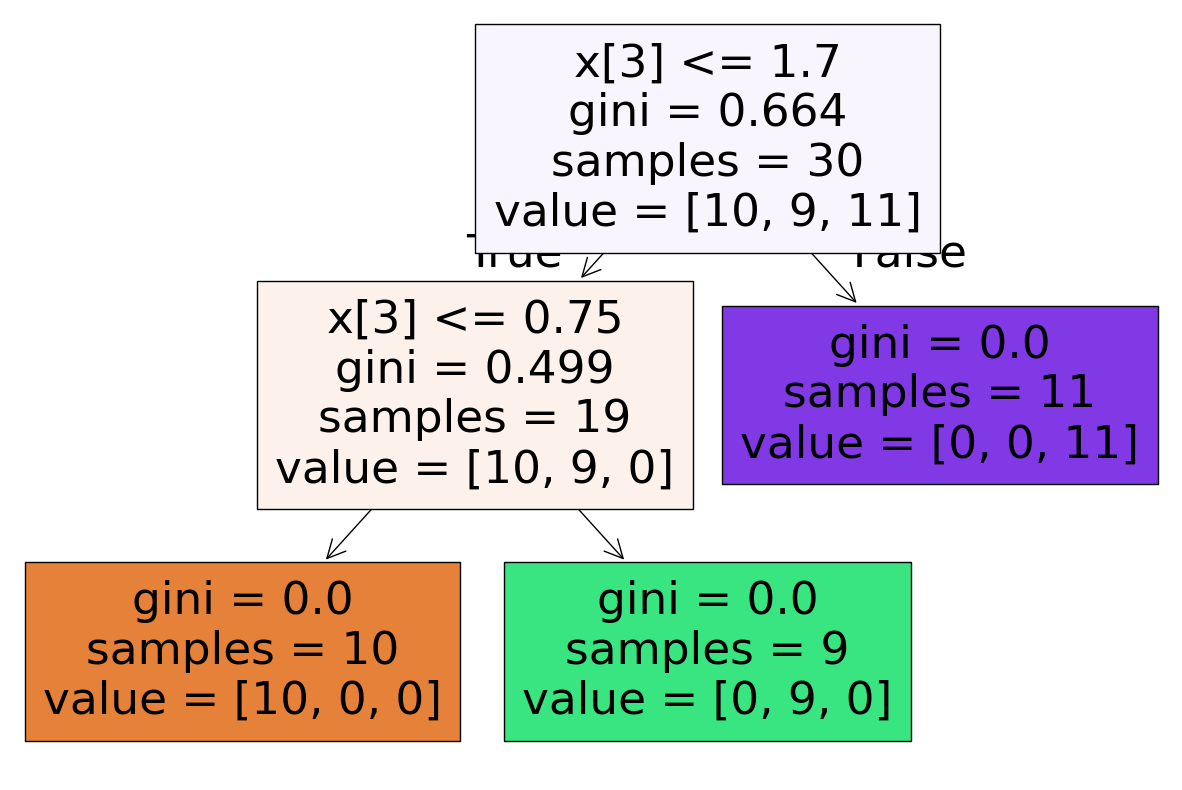

In [22]:
## Visualise The decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

[Text(0.5, 0.75, 'x[3] <= 1.7\ngini = 0.664\nsamples = 30\nvalue = [10, 9, 11]'),
 Text(0.25, 0.25, 'gini = 0.499\nsamples = 19\nvalue = [10, 9, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.625, 0.5, '  False')]

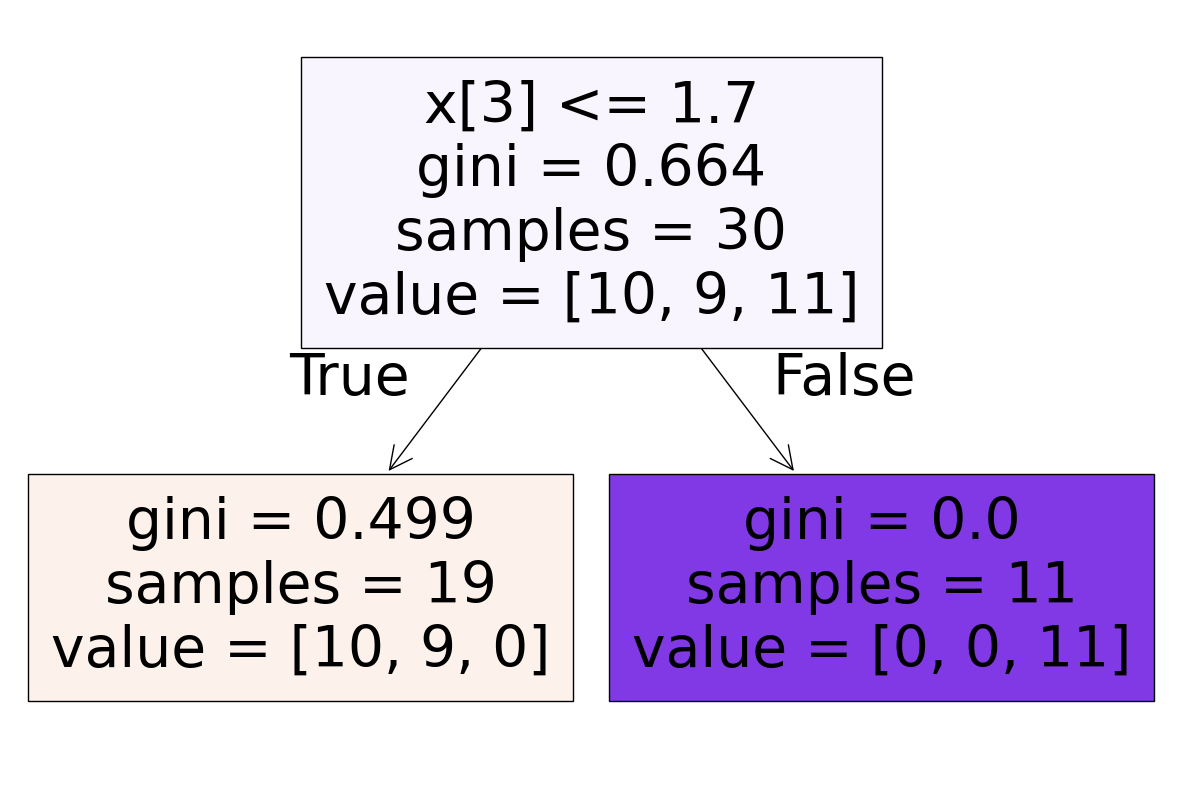

In [24]:
## We do prunning if required by defing max_depth in post pruning case

treeclassifier = DecisionTreeClassifier(max_depth=1)
treeclassifier.fit(X_test,y_test)
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [25]:
# Now for prediction
y_pred = treeclassifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7
[[10  0  0]
 [ 9  0  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9
           2       1.00      1.00      1.00        11

    accuracy                           0.70        30
   macro avg       0.51      0.67      0.56        30
weighted avg       0.54      0.70      0.60        30



C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

# Pre Punning and Hypertuning

In [45]:
param = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2']

}

In [46]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [47]:
from sklearn.model_selection import GridSearchCV


In [48]:
treemodel = DecisionTreeClassifier()

In [49]:
grid = GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [51]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [53]:
grid.best_score_

np.float64(0.95)

In [54]:
y_pred = grid.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [56]:
## DEcision Tree For Regressor see video